In [ ]:
# Basic Libraries Required:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import folium
from geopy.geocoders import Nominatim
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import linear_kernel,  cosine_similarity
%matplotlib inline

In [ ]:
!pip install keras
import keras

In [ ]:
!pip install --upgrade keras

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from keras.callbacks import EarlyStopping
import math
import os

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

##BUILDING :
# Bhubaneswar PG RECOMMENDER SYSTEM

##1)LOADING DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pgdata = pd.read_csv('/content/drive/MyDrive/Book1.csv')

##2)DATA EXPLORATION

In [ ]:
pgdata.head()

,Name,Address,Price,Gender,Description,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,sharing,PGID,Rating
0,Khandagiri Stay PG/Paying Guest,Khandagiri,6000,Boys,"Khandagiri Stay, professionally managed PG hom...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single-Double,PG1,5
1,Vaishnavi Ladies PG/Paying Guest,Chandrasekharpur,"2,500",Girls,"Vaishnavi PG, Professionally Managed PG Home, ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Double-Triple,PG2,4
2,The Basic PG/Paying Guest only for Professionals,Gajapati Nagar,"8,500",Coed,"The Basic, A professionally managed PG home, G...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Single-Double,PG3,3
3,AuroMaa PG/Paying Guest,Rasulgarh,5500,Boys,"Rasulgarh, Bhubaneswar, AuroMaa PG, modern ,s...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Double,PG4,4
4,Devi Girls Hostel PG/Paying Guest,Jayadev Vihar,"2,499",Girls,"Devi Girls Hostel, professionally managed, PG...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Triple,PG5,5


In [ ]:
pgdata.columns

Index(['Name', 'Address', 'Price', 'Gender', 'Description', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'sharing', 'PGID', 'Rating'],
      dtype='object')

In [ ]:
pgdata.isna().sum()

Name            0
Address         0
Price           0
Gender          0
Description     0
Unnamed: 5     30
Unnamed: 6     30
Unnamed: 7     30
Unnamed: 8     30
Unnamed: 9     30
Unnamed: 10    30
Unnamed: 11    30
Unnamed: 12    30
Unnamed: 13    30
Unnamed: 14    30
Unnamed: 15    30
Unnamed: 16    30
Unnamed: 17    30
Unnamed: 18    30
Unnamed: 19    30
Unnamed: 20    30
Unnamed: 21    30
Unnamed: 22    30
Unnamed: 23    30
Unnamed: 24    30
Unnamed: 25    30
Unnamed: 26    30
Unnamed: 27    30
Unnamed: 28    30
Unnamed: 29    30
Unnamed: 30    30
Unnamed: 31    30
Unnamed: 32    30
Unnamed: 33    30
Unnamed: 34    30
Unnamed: 35    30
Unnamed: 36    30
Unnamed: 37    30
Unnamed: 38    30
Unnamed: 39    30
sharing         0
PGID            0
Rating          0
dtype: int64

In [ ]:
pg_df = pd.DataFrame(pgdata[['Name','Address','Price','Gender','Description','PGID','sharing','Rating']])
pg_df.dropna()
pg_df.head(5)

,Name,Address,Price,Gender,Description,PGID,sharing,Rating
0,Khandagiri Stay PG/Paying Guest,Khandagiri,6000,Boys,"Khandagiri Stay, professionally managed PG hom...",PG1,Single-Double,5
1,Vaishnavi Ladies PG/Paying Guest,Chandrasekharpur,"2,500",Girls,"Vaishnavi PG, Professionally Managed PG Home, ...",PG2,Double-Triple,4
2,The Basic PG/Paying Guest only for Professionals,Gajapati Nagar,"8,500",Coed,"The Basic, A professionally managed PG home, G...",PG3,Single-Double,3
3,AuroMaa PG/Paying Guest,Rasulgarh,5500,Boys,"Rasulgarh, Bhubaneswar, AuroMaa PG, modern ,s...",PG4,Double,4
4,Devi Girls Hostel PG/Paying Guest,Jayadev Vihar,"2,499",Girls,"Devi Girls Hostel, professionally managed, PG...",PG5,Triple,5


In [ ]:
pg_df.describe()

,Rating
count,30.00000
mean,3.90000
std,1.09387
min,2.00000
25%,3.00000
50%,4.00000
75%,5.00000
max,5.00000


In [ ]:
pg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         30 non-null     object
 1   Address      30 non-null     object
 2   Price        30 non-null     object
 3   Gender       30 non-null     object
 4   Description  30 non-null     object
 5   PGID         30 non-null     object
 6   sharing      30 non-null     object
 7   Rating       30 non-null     int64 
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [ ]:
pg_df['sharing']

0                 Single-Double
1                 Double-Triple
2                 Single-Double
3                        Double
4                        Triple
5                        Triple
6                 Double-Triple
7          Single-Double-Triple
8                          Twin
9     Single-Double-Triple-Four
10    Single-Double-Triple-Four
11                Single-Double
12                Double-Triple
13                Double-Triple
14                       Single
15                       Single
16                       Single
17                       Single
18             Single-apartment
19             Double-apartment
20                Double-Triple
21                       Double
22                       Double
23                       Double
24                       Triple
25                Single-Double
26                       Single
27                       Double
28             Single-apartment
29                         Twin
Name: sharing, dtype: object

##Vizualisation of available PG type based on Gender

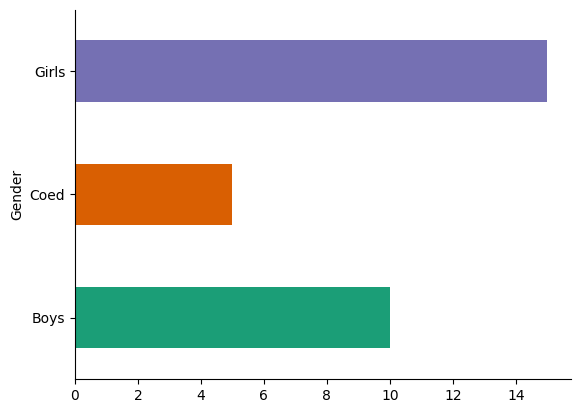

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
pg_df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
pg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         30 non-null     object
 1   Address      30 non-null     object
 2   Price        30 non-null     object
 3   Gender       30 non-null     object
 4   Description  30 non-null     object
 5   PGID         30 non-null     object
 6   sharing      30 non-null     object
 7   Rating       30 non-null     int64 
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [ ]:
pg_df.isna().sum()

Name           0
Address        0
Price          0
Gender         0
Description    0
PGID           0
sharing        0
Rating         0
dtype: int64

In [ ]:
pg_df.isna().sum().sum()

0

In [ ]:
pg_df.shape

(30, 8)

In [ ]:
pg_df.drop_duplicates(subset='PGID',keep=False,inplace=True)
pg_df.shape

(30, 8)

###observation : no duplicate data present in scrapped data.Fit to use for collaborative content filtering

In [ ]:
# pg_df.describe(include='all')
pg_df.describe()

,Rating
count,30.00000
mean,3.90000
std,1.09387
min,2.00000
25%,3.00000
50%,4.00000
75%,5.00000
max,5.00000


# Popularity Based filtering

In [ ]:
no_pg_rated_per_user=pg_df.groupby(by="Gender")['Rating'].count().sort_values(ascending=False)

In [ ]:
print(f"pg rated more than 3 per user: {sum(no_pg_rated_per_user>=3)}")

pg rated more than 3 per user: 3


In [ ]:
df=pg_df.groupby(by='Address').filter(lambda x:x['Rating'].count()>=3)

In [ ]:
df.head(15)

,Name,Address,Price,Gender,Description,PGID,sharing,Rating
5,Prasanta Hostel PG/Paying Guest,Nayapalli,2600,Girls,"Prasanta hostel,prime location in bhubaneswar,...",PG6,Triple,5
6,Executive Ladies PG/Paying Guest Cum Girls Hostel,Nayapalli,3500,Girls,"Ladies PG, a professionally managed PG home,Na...",PG7,Double-Triple,3
7,Paying Guest House - PG,Patia,8500,Boys,"Patia, Bhubaneswar, Paying Guest House , moder...",PG8,Single-Double-Triple,2
9,Goshelter PG/Paying Guest and hostels for Boys...,Patia,3900,Coed,"Goshelter pg and hostels, for Boys and Girls, ...",PG10,Single-Double-Triple-Four,5
10,Pabitra Mohan House PG/Paying Guest,Nayapalli,2100,Girls,"Pabitra Mohan House, a professionally managed,...",PG11,Single-Double-Triple-Four,2
11,Swastik Ladies Hostel PG/Paying Guest,Nayapalli,2199,Girls,"Swastik Ladies Hostel, Finest Level of Hospita...",PG12,Single-Double,5
12,Dream Home PG/Paying Guest For Boys,Nayapalli,10500,Boys,"Dream Home PG , For Boys, professionally mana...",PG13,Double-Triple,4
14,Binayak Plaza PG/Paying Guest,Nayapalli,15600,Coed,"Nayapalli, Bhubaneswar, Binayak Plaza , moder...",PG15,Single,5
22,PatiaSingle Room in a 3 Bhk apartment,Patia,4600,Boys,"Infocity, Bhubaneswar, 3 bedroom property , mo...",PG23,Double,4


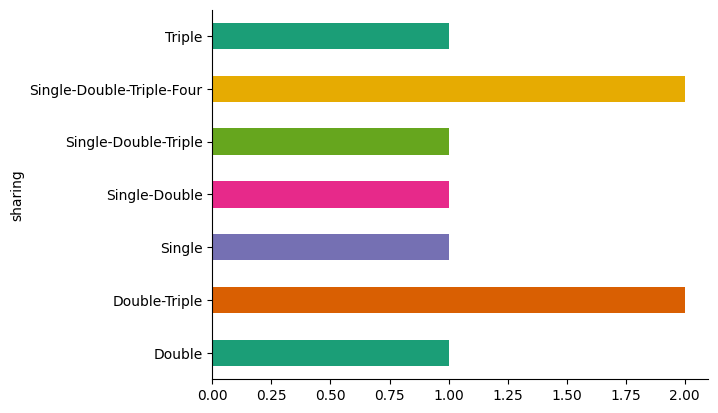

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sharing').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##Drawn essence from Dataset:
-Nayapalli has most no of Paying guests

-The average PG price is 6000

-More no of Girl PG options are available

-Top descriptions being a professionally managed accomodation , Khandagiri stay,etc.

In [ ]:
pg_df.columns

Index(['Name', 'Address', 'Price', 'Gender', 'Description', 'PGID', 'sharing',
       'Rating'],
      dtype='object')

In [ ]:
pg_df['Price'] = pg_df['Price'].str.replace(',', '').astype(float)


In [ ]:
pg_df['Description'] = pg_df['Description'].str.replace('.',',')

In [ ]:
# First address based recommendation engine :
def addrbased(Address):
    pg_df['Address']=pg_df['Address'].str.lower()
    addrbase=pg_df[pg_df['Address'] == Address.lower()]
    addrbase=addrbase.sort_values(by='Price',ascending=True)
    addrbase.drop_duplicates(subset='PGID',keep='first',inplace=True)
    if(addrbase.empty==0):
        avail =addrbase[['Name','Address','Gender','Description','PGID','sharing']]
        return avail.head()
    else:
        print('No available PG found :( /n try another input ? \n')

In [ ]:
# ALL available addresses in dataset
pg_df['Address']

0            Khandagiri
1      Chandrasekharpur
2        Gajapati Nagar
3             Rasulgarh
4         Jayadev Vihar
5             Nayapalli
6             Nayapalli
7                 Patia
8         Niladri Vihar
9                 Patia
10            Nayapalli
11            Nayapalli
12            Nayapalli
13         Saheed Nagar
14            Nayapalli
15             Jagamara
16       Kalpana Square
17         Raghunathpur
18          Shree Vihar
19          Sahid Nagar
20             Jagamara
21               Unit 9
22                Patia
23          IRC Village
24       Gajapati Nagar
25           Khandagiri
26          KIIT Square
27     Sailashree Vihar
28       Tankapani Road
29             Bomikhal
Name: Address, dtype: object

In [ ]:
# Top 5 locations in bbsr with PGs are:
top_addresses = pg_df['Address'].value_counts().head()
print("Top 5 locations in bbsr with PGs are: \n ",top_addresses)

Top 5 locations in bbsr with PGs are: 
  Address
Nayapalli         6
Patia             3
Khandagiri        2
Gajapati Nagar    2
Jagamara          2
Name: count, dtype: int64


In [ ]:
print('Top PGs in Patia')
addrbased('Patia')

Top PGs in Patia


,Name,Address,Gender,Description,PGID,sharing
9,Goshelter PG/Paying Guest and hostels for Boys...,patia,Coed,"Goshelter pg and hostels, for Boys and Girls, ...",PG10,Single-Double-Triple-Four
22,PatiaSingle Room in a 3 Bhk apartment,patia,Boys,"Infocity, Bhubaneswar, 3 bedroom property , mo...",PG23,Double
7,Paying Guest House - PG,patia,Boys,"Patia, Bhubaneswar, Paying Guest House , moder...",PG8,Single-Double-Triple


In [ ]:
print("Most frequent location searches : ",top_addresses,"\n")
addr1 = input("#Welcome! enter a Bbsr location (type please): ")
print('Top PG results',addr1,":")
addrbased(addr1)

Most frequent location searches :  Address
Nayapalli         6
Patia             3
Khandagiri        2
Gajapati Nagar    2
Jagamara          2
Name: count, dtype: int64 

#Welcome! enter a Bbsr location (type please): patia
Top PG results patia :


,Name,Address,Gender,Description,PGID,sharing
9,Goshelter PG/Paying Guest and hostels for Boys...,patia,Coed,"Goshelter pg and hostels, for Boys and Girls, ...",PG10,Single-Double-Triple-Four
22,PatiaSingle Room in a 3 Bhk apartment,patia,Boys,"Infocity, Bhubaneswar, 3 bedroom property , mo...",PG23,Double
7,Paying Guest House - PG,patia,Boys,"Patia, Bhubaneswar, Paying Guest House , moder...",PG8,Single-Double-Triple


In [ ]:
pg_df['sharing'].unique()

array(['Single-Double', 'Double-Triple', 'Double', 'Triple',
       'Single-Double-Triple', 'Twin', 'Single-Double-Triple-Four',
       'Single', 'Single-apartment', 'Double-apartment'], dtype=object)

In [ ]:
room_no = {
    'Single-Double': 12,
    'Double-Triple': 23,
    'Triple': 3,
    'Double': 2,
    'Single-Double-Triple-Four': 1234,
    'Twin': 2,
    'Single-Double-Triple': 123,
    'Single': 1,
    'Double-apartment': 2,
    'Single-apartment': 1
}

In [ ]:
def calc():
    no_of_occupancy = []
    for i in range(pg_df.shape[0]):
        temp = pg_df['sharing'][i].lower().split()
        flag = 0
        for j in range(len(temp)):
            for guests in room_no:
                if temp[j] == guests.lower():
                    no_of_occupancy.append(room_no[guests])
                    flag = 1
                    break
            if flag == 1:
                break
        if flag == 0:
            no_of_occupancy.append(2)
    pg_df['no_of_occupancy'] = no_of_occupancy

calc()

In [ ]:
pg_df.head(10)

,Name,Address,Price,Gender,Description,PGID,sharing,Rating,no_of_occupancy
0,Khandagiri Stay PG/Paying Guest,khandagiri,6000.0,Boys,"Khandagiri Stay, professionally managed PG hom...",PG1,Single-Double,5,12
1,Vaishnavi Ladies PG/Paying Guest,chandrasekharpur,2500.0,Girls,"Vaishnavi PG, Professionally Managed PG Home, ...",PG2,Double-Triple,4,23
2,The Basic PG/Paying Guest only for Professionals,gajapati nagar,8500.0,Coed,"The Basic, A professionally managed PG home, G...",PG3,Single-Double,3,12
3,AuroMaa PG/Paying Guest,rasulgarh,5500.0,Boys,"Rasulgarh, Bhubaneswar, AuroMaa PG, modern ,s...",PG4,Double,4,2
4,Devi Girls Hostel PG/Paying Guest,jayadev vihar,2499.0,Girls,"Devi Girls Hostel, professionally managed, PG...",PG5,Triple,5,3
5,Prasanta Hostel PG/Paying Guest,nayapalli,2600.0,Girls,"Prasanta hostel,prime location in bhubaneswar,...",PG6,Triple,5,3
6,Executive Ladies PG/Paying Guest Cum Girls Hostel,nayapalli,3500.0,Girls,"Ladies PG, a professionally managed PG home,Na...",PG7,Double-Triple,3,23
7,Paying Guest House - PG,patia,8500.0,Boys,"Patia, Bhubaneswar, Paying Guest House , moder...",PG8,Single-Double-Triple,2,123
8,Sai Hostel PG/Paying Guest,niladri vihar,2600.0,Girls,"Sai Hostel Center, Bhubaneswar , Distric cente...",PG9,Twin,3,2
9,Goshelter PG/Paying Guest and hostels for Boys...,patia,3900.0,Coed,"Goshelter pg and hostels, for Boys and Girls, ...",PG10,Single-Double-Triple-Four,5,1234


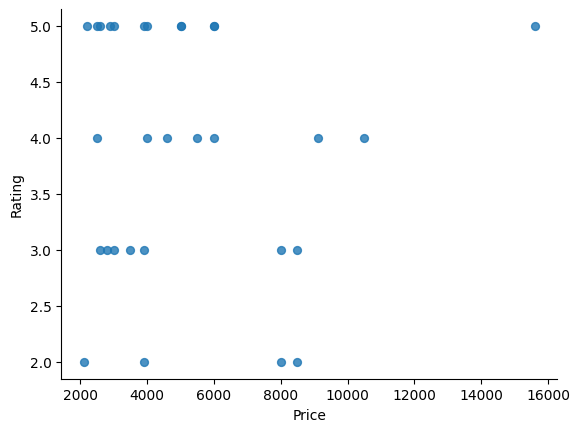

In [ ]:
from matplotlib import pyplot as plt
pg_df.plot(kind='scatter', x='Price', y='Rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Visualization

<ipython-input-43-e509883adfef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(pg_df, x='no_of_occupancy', y='Gender', inner='stick', palette='Dark2')


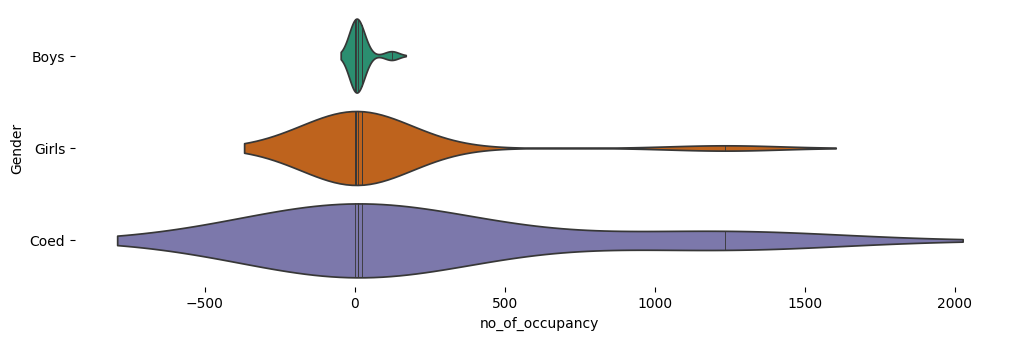

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(pg_df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(pg_df, x='no_of_occupancy', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

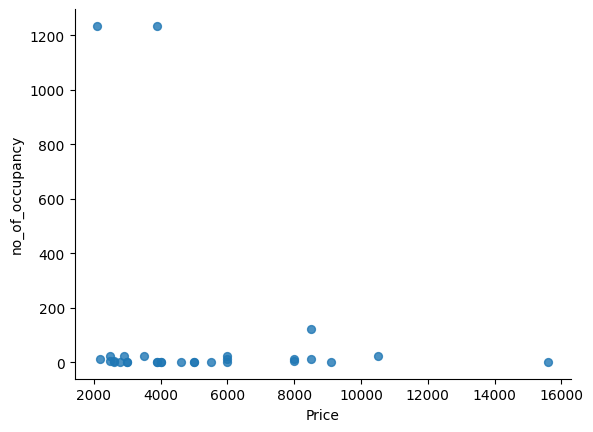

In [ ]:
from matplotlib import pyplot as plt
pg_df.plot(kind='scatter', x='Price', y='no_of_occupancy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

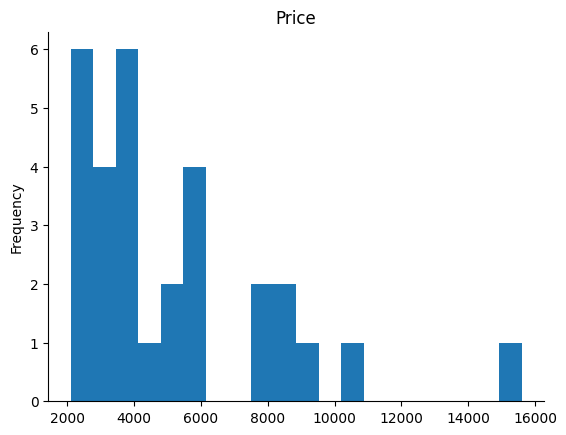

In [ ]:
from matplotlib import pyplot as plt
pg_df['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-46-d7bd9e53e47b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(pg_df, x='Price', y='Gender', inner='stick', palette='Dark2')


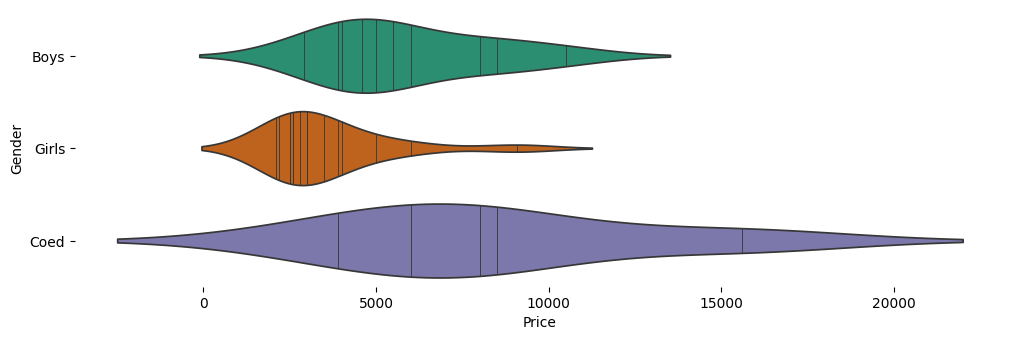

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(pg_df['Gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(pg_df, x='Price', y='Gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
pg_df.head(2)

,Name,Address,Price,Gender,Description,PGID,sharing,Rating,no_of_occupancy
0,Khandagiri Stay PG/Paying Guest,khandagiri,6000.0,Boys,"Khandagiri Stay, professionally managed PG hom...",PG1,Single-Double,5,12
1,Vaishnavi Ladies PG/Paying Guest,chandrasekharpur,2500.0,Girls,"Vaishnavi PG, Professionally Managed PG Home, ...",PG2,Double-Triple,4,23


In [ ]:
# City and no_of_occupancy available based Recommender engine:
def LocGuest(loc,occupancy):
    pg_df['Address']=pg_df['Address'].str.lower()
    LocGuest = pg_df[pg_df['Address']==loc.lower()]
   
    LocGuest=LocGuest[LocGuest['no_of_occupancy'] == occupancy].sort_values(by='Price',ascending=True)
    LocGuest.drop_duplicates(subset='PGID',keep='first',inplace=True)
    if LocGuest.empty==True:
        print('Sorry No Available PGs found \n Try another loc?')
    else:
        return LocGuest[['Name','Address','sharing','no_of_occupancy','Price','Description']].head()

In [ ]:
print("Most frequent location searches : ",top_addresses,"\n")
loc = input("#Welcome! enter a Bbsr location (type please) :\n")
guests = int(input("enter no of guest sharing accomodation : \n menu : \n (\t Single/Double: 12,\n Double/Triple: 23,\n Triple: 3, \n Double: 2,  \n Single/Double/Triple/Four: 1234, \n 'Twin': 2,  \n 'Single/Double/Triple': 123,  \n 'Single': 1, \n 'Double/apartment': 2, \n 'Single/apartment': 1)"))
print('Top 5 PG results : ')
LocGuest(loc,guests)

Most frequent location searches :  Address
Nayapalli         6
Patia             3
Khandagiri        2
Gajapati Nagar    2
Jagamara          2
Name: count, dtype: int64 

#Welcome! enter a Bbsr location (type please) :
patia
enter no of guest sharing accomodation : 
 menu : 
 (	 Single/Double: 12,
 Double/Triple: 23,
 Triple: 3, 
 Double: 2,  
 Single/Double/Triple/Four: 1234, 
 'Twin': 2,  
 'Single/Double/Triple': 123,  
 'Single': 1, 
 'Double/apartment': 2, 
 'Single/apartment': 1)2
Top 5 PG results : 


,Name,Address,sharing,no_of_occupancy,Price,Description
22,PatiaSingle Room in a 3 Bhk apartment,patia,Double,2,4600.0,"Infocity, Bhubaneswar, 3 bedroom property , mo..."


In [ ]:
pg_df.head()

,Name,Address,Price,Gender,Description,PGID,sharing,Rating,no_of_occupancy
0,Khandagiri Stay PG/Paying Guest,khandagiri,6000.0,Boys,"Khandagiri Stay, professionally managed PG hom...",PG1,Single-Double,5,12
1,Vaishnavi Ladies PG/Paying Guest,chandrasekharpur,2500.0,Girls,"Vaishnavi PG, Professionally Managed PG Home, ...",PG2,Double-Triple,4,23
2,The Basic PG/Paying Guest only for Professionals,gajapati nagar,8500.0,Coed,"The Basic, A professionally managed PG home, G...",PG3,Single-Double,3,12
3,AuroMaa PG/Paying Guest,rasulgarh,5500.0,Boys,"Rasulgarh, Bhubaneswar, AuroMaa PG, modern ,s...",PG4,Double,4,2
4,Devi Girls Hostel PG/Paying Guest,jayadev vihar,2499.0,Girls,"Devi Girls Hostel, professionally managed, PG...",PG5,Triple,5,3


In [ ]:
pg_df.columns

Index(['Name', 'Address', 'Price', 'Gender', 'Description', 'PGID', 'sharing',
       'Rating', 'no_of_occupancy'],
      dtype='object')

In [ ]:
pg_df.describe(include='all')

,Name,Address,Price,Gender,Description,PGID,sharing,Rating,no_of_occupancy
count,30,30,30.000000,30,30,30,30,30.00000,30.000000
unique,29,20,NaN,3,30,30,10,NaN,NaN
top,Bed in a 2 Bhk apartment,nayapalli,NaN,Girls,"Khandagiri Stay, professionally managed PG hom...",PG1,Double-Triple,NaN,NaN
freq,2,6,NaN,15,1,1,5,NaN,NaN
mean,NaN,NaN,5189.933333,NaN,NaN,NaN,NaN,3.90000,92.866667
std,NaN,NaN,3049.354719,NaN,NaN,NaN,NaN,1.09387,311.016213
min,NaN,NaN,2100.000000,NaN,NaN,NaN,NaN,2.00000,1.000000
25%,NaN,NaN,2925.000000,NaN,NaN,NaN,NaN,3.00000,2.000000
50%,NaN,NaN,4000.000000,NaN,NaN,NaN,NaN,4.00000,2.500000
75%,NaN,NaN,6000.000000,NaN,NaN,NaN,NaN,5.00000,20.250000


In [ ]:
pg_df.isna().sum()

Name               0
Address            0
Price              0
Gender             0
Description        0
PGID               0
sharing            0
Rating             0
no_of_occupancy    0
dtype: int64

#FINAL Recommender engine :
##(content based collaborative filtering)

In [ ]:
pg_df['Price'] = pg_df['Price'].astype(int)

In [ ]:
# City,price and no_of_occupancy available based Recommender engine:
def pgLocGuest(loc,occupancy,budget,Description):

    pg_df['Address']=pg_df['Address'].str.lower()
    # LocGuest = pg_df[pg_df['Address']==loc.lower()]
    pg_df['Price'] = pg_df['Price'].astype(int)
    # LocGuest =pg_df[pg_df['Price']<= int(budget)]
    # cheapest options displayed First
    # LocGuest=LocGuest[LocGuest['no_of_occupancy'] == occupancy].sort_values(by='Price',ascending=True)
    # LocGuest.drop_duplicates(subset='PGID',keep='first',inplace=True)

    pg_df['Description']=pg_df['Description'].str.lower()
    Description=Description.lower()
    Description_tokens=word_tokenize(Description)
    sw = stopwords.words('english')
    lemm = WordNetLemmatizer()
    f1_set = {w for w in Description_tokens if not w in sw}
    f_set=set()
    for se in f1_set:
        f_set.add(lemm.lemmatize(se))
    pgLocGuest=pg_df[pg_df['Address']==loc.lower()]
    pgLocGuest =pg_df[pg_df['Price']<= int(budget)]

    pgLocGuest=pgLocGuest[pgLocGuest['no_of_occupancy'] == occupancy].sort_values(by='Price',ascending=False)
    pgLocGuest.drop_duplicates(subset='PGID',keep='first',inplace=True)

    pgLocGuest=pgLocGuest.set_index(np.arange(pgLocGuest.shape[0]))
    l1 =[];l2 =[];cos=[];
    #print(reqbased['roomamenities'])
    for i in range(pgLocGuest.shape[0]):
        temp_tokens=word_tokenize(pgLocGuest['Description'][i])
        temp1_set={w for w in temp_tokens if not w in sw}
        temp_set=set()
        for se in temp1_set:
            temp_set.add(lemm.lemmatize(se))
        rvector = temp_set.intersection(f_set)
        #print(rvector)
        cos.append(len(rvector))
    pgLocGuest['similarity']=cos
    pgLocGuest=pgLocGuest.sort_values(by='similarity',ascending=False)
    pgLocGuest.drop_duplicates(subset='PGID',keep='first',inplace=True)
    if pgLocGuest.empty==True:
        print('Sorry No Available PGs found \n Try another loc or tune filters ?')
    else:
        return pgLocGuest[['Name','Address','sharing','no_of_occupancy','Price','Description','similarity','Rating']].head()


In [ ]:
print("Most frequent location searches : ",top_addresses,"\n")
loc = input("#Welcome! enter a Bbsr location (type please) :\n")
guests = int(input("enter no of guest sharing accomodation : \n menu : \n (\t Single/Double: 12,\n Double/Triple: 23,\n Triple: 3, \n Double: 2,  \n Single/Double/Triple/Four: 1234, \n 'Twin': 2,  \n 'Single/Double/Triple': 123,  \n 'Single': 1, \n 'Double/apartment': 2, \n 'Single/apartment': 1)"))
budget =int(input("enter ur budget  : \n"))
described = input("any specific requirements(eg: 'safe neighbourhood','comfort',etc) : \n")
print('Top 5 PG results : ')
pgLocGuest(loc,guests,budget,described)

Most frequent location searches :  Address
Nayapalli         6
Patia             3
Khandagiri        2
Gajapati Nagar    2
Jagamara          2
Name: count, dtype: int64 

#Welcome! enter a Bbsr location (type please) :
Khandagiri
enter no of guest sharing accomodation : 
 menu : 
 (	 Single/Double: 12,
 Double/Triple: 23,
 Triple: 3, 
 Double: 2,  
 Single/Double/Triple/Four: 1234, 
 'Twin': 2,  
 'Single/Double/Triple': 123,  
 'Single': 1, 
 'Double/apartment': 2, 
 'Single/apartment': 1)12
enter ur budget  : 
6000
any specific requirements(eg: 'safe neighbourhood','comfort',etc) : 
safe neighbourhood,Professionally Managed PG Home
Top 5 PG results : 


,Name,Address,sharing,no_of_occupancy,Price,Description,similarity,Rating
0,Khandagiri Stay PG/Paying Guest,khandagiri,Single-Double,12,6000,"khandagiri stay, professionally managed pg hom...",6,5
1,Swastik Ladies Hostel PG/Paying Guest,nayapalli,Single-Double,12,2199,"swastik ladies hostel, finest level of hospita...",1,5
